In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
img=image.load_img(r"D:\Training\Happy Images\2.jpg")

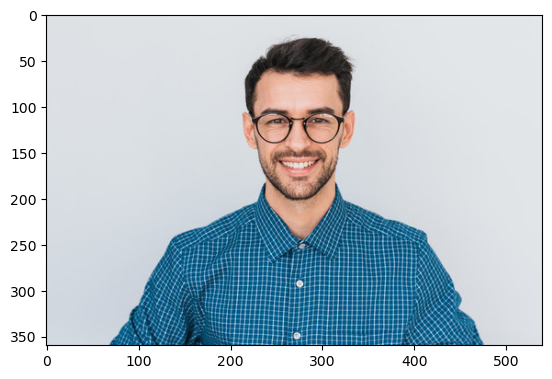

In [4]:
plt.imshow(img)

In [5]:
i1=cv2.imread(r"D:\Training\Happy Images\2.jpg")
i1

array([[[228, 225, 221],
        [228, 225, 221],
        [228, 225, 221],
        ...,
        [234, 231, 227],
        [234, 231, 227],
        [234, 231, 227]],

       [[228, 225, 221],
        [228, 225, 221],
        [228, 225, 221],
        ...,
        [234, 231, 227],
        [234, 231, 227],
        [234, 231, 227]],

       [[228, 225, 221],
        [228, 225, 221],
        [228, 225, 221],
        ...,
        [234, 231, 227],
        [234, 231, 227],
        [234, 231, 227]],

       ...,

       [[227, 219, 212],
        [227, 219, 212],
        [227, 219, 212],
        ...,
        [229, 224, 221],
        [229, 224, 221],
        [229, 224, 221]],

       [[227, 219, 212],
        [227, 219, 212],
        [227, 219, 212],
        ...,
        [229, 224, 221],
        [229, 224, 221],
        [229, 224, 221]],

       [[227, 219, 212],
        [227, 219, 212],
        [227, 219, 212],
        ...,
        [229, 224, 221],
        [229, 224, 221],
        [229, 224, 221]]

In [6]:
i1.shape

(360, 540, 3)

In [7]:
train = ImageDataGenerator(rescale = 1/255)
validataion = ImageDataGenerator(rescale = 1/255)
# to scale all the images i need to divide with 255
# we need to resize the image using 200, 200 pixel

In [8]:
train_dataset = train.flow_from_directory(r"D:\Training",
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validataion_dataset = validataion.flow_from_directory(r"D:\Validation",
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 26 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [9]:
train_dataset.class_indices

{'Happy Images': 0, 'Sad Images': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1])

In [11]:
# now we are applying maxpooling

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate= 0.001),
              metrics = ['accuracy']
              )

In [13]:
model_fit = model.fit(train_dataset,
                     epochs = 15,)

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step - accuracy: 0.7470 - loss: 17.5595
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/step - accuracy: 0.8418 - loss: 0.7522
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 295ms/step - accuracy: 0.8463 - loss: 0.6869
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 369ms/step - accuracy: 0.8725 - loss: 0.4174
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 360ms/step - accuracy: 0.8349 - loss: 0.2477
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step - accuracy: 1.0000 - loss: 0.1935
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 1.0000 - loss: 0.0825
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 299ms/step - accuracy: 0.9803 - loss: 0.0233
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - accuracy: 0.9830 - loss: 0.0730
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step - accuracy: 1.0000 - loss: 0.0213
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 305ms/step - accuracy: 1.0000 - loss: 0.0013
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step - accuracy: 1.0000 - l

In [14]:
dir_path = r"D:\Testing"
for i in os.listdir(dir_path ):
    print(i)
    #img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
   # plt.imshow(img)
   # plt.show()

1.jpg
10.jpg
11.jpg
2.jpg
3.png
4.jpg
5.png
6.jpg
7.png
8.jpg
9.jpg


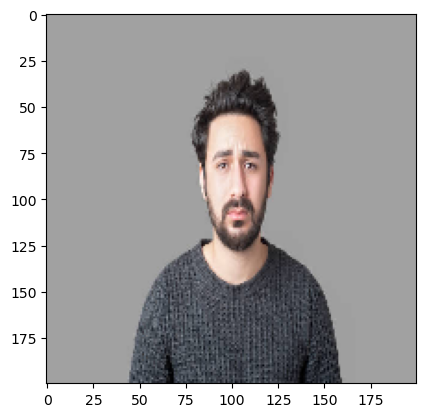

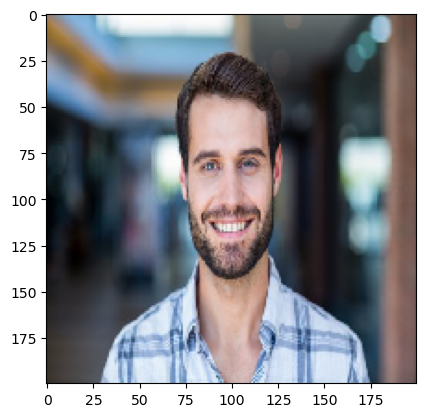

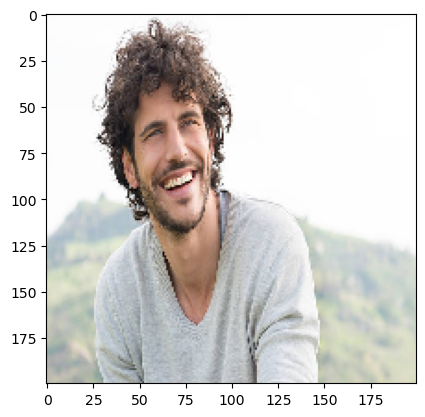

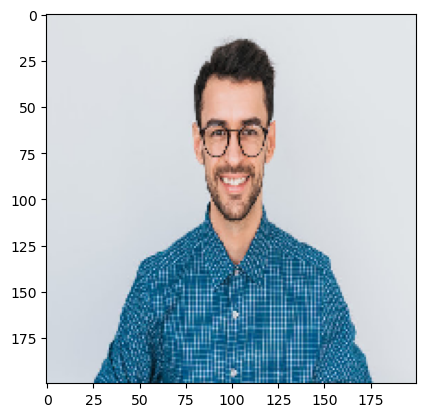

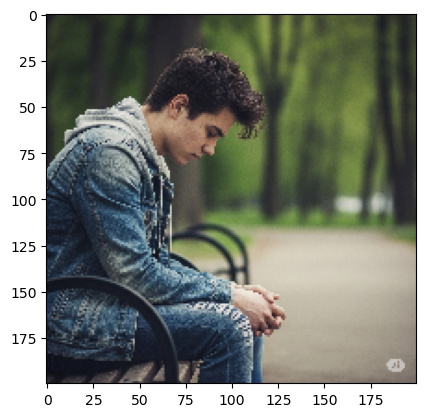

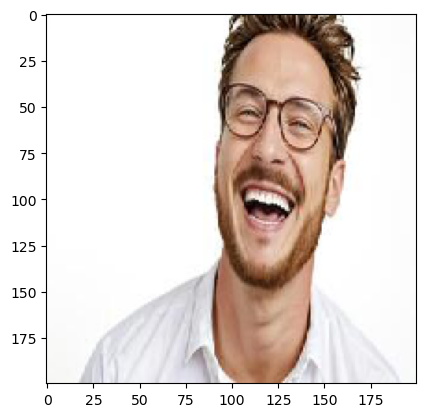

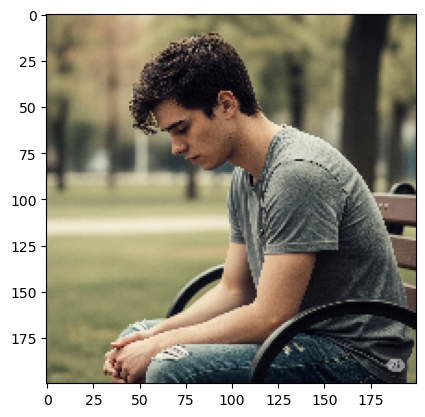

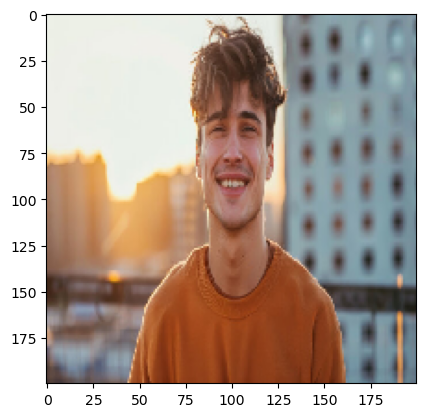

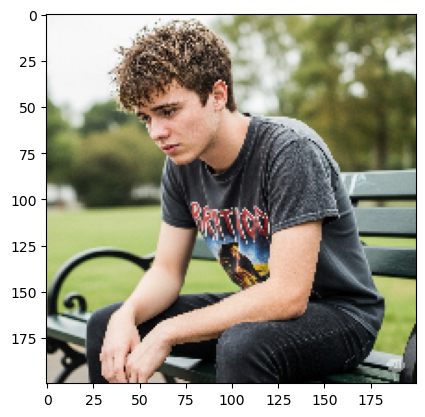

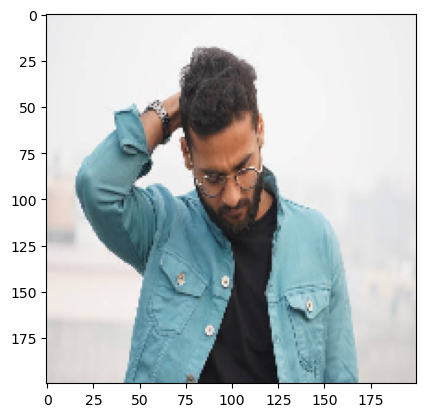

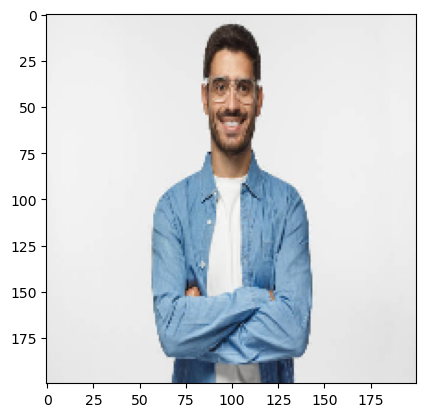

In [15]:
dir_path = r"D:\Testing"
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

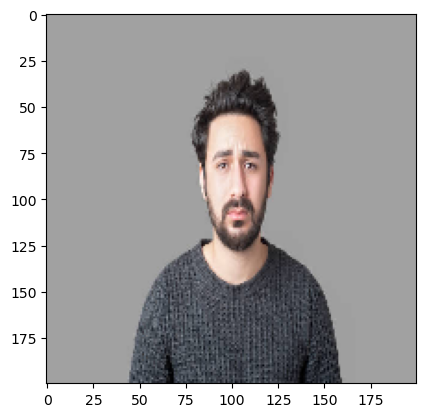

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
I am Not Happy


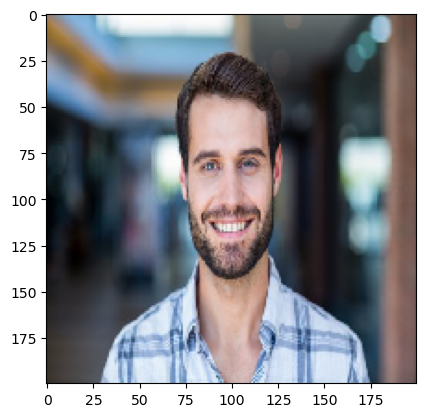

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
 I am Happy


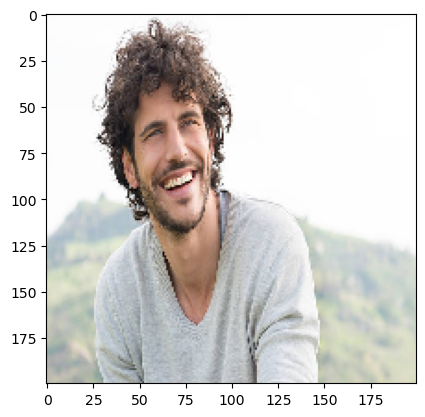

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
 I am Happy


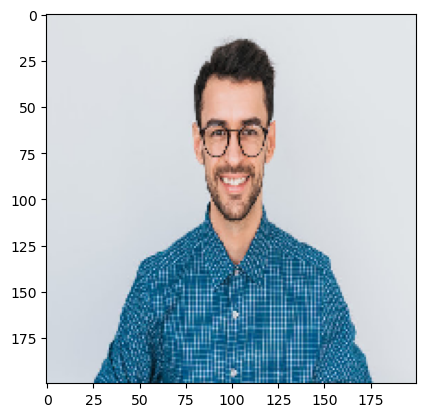

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
 I am Happy


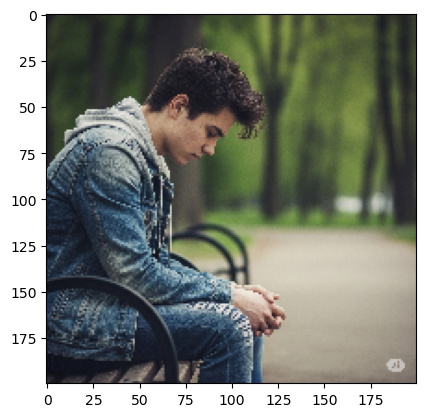

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
I am Not Happy


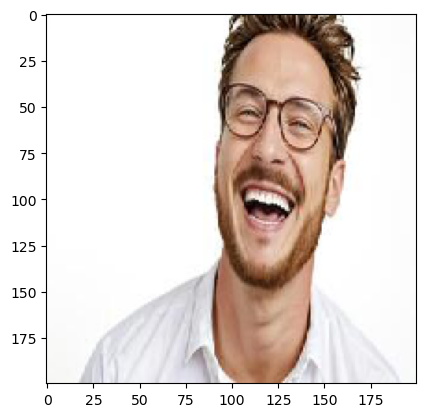

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
 I am Happy


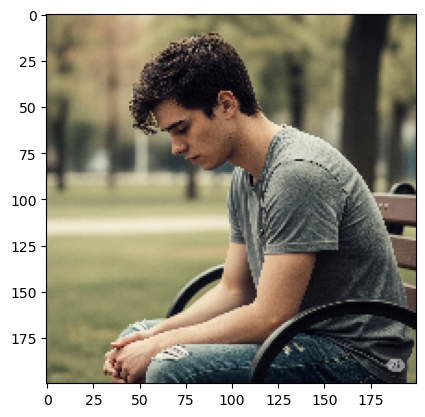

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
I am Not Happy


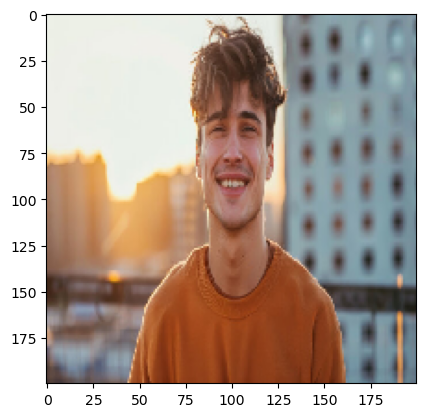

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
 I am Happy


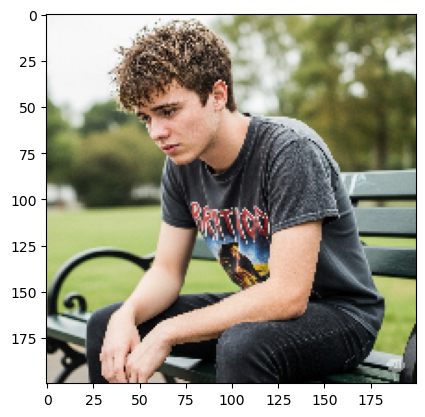

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
I am Not Happy


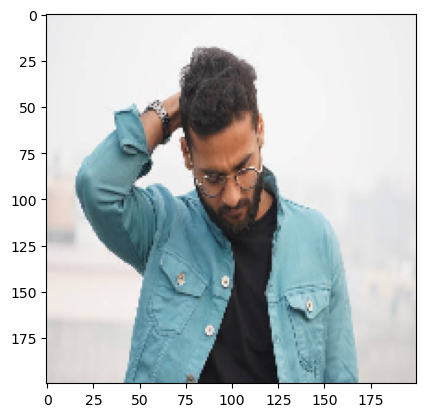

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
I am Not Happy


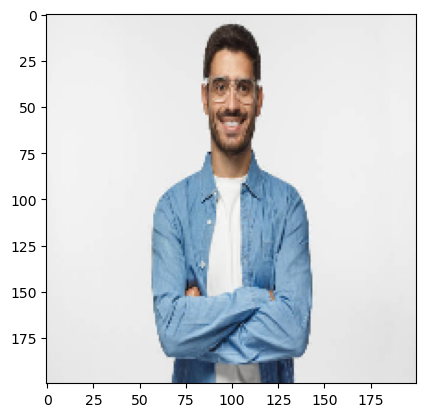

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
 I am Happy


In [16]:
dir_path = r"D:\Testing"
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])

    val = model.predict(images)
    if val == 0:
        print( ' I am Happy')
    else:
        print('I am Not Happy')

In [17]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
model.save('Mood-Classifier.h5')